# Part 2: Spatial Interaction models

## III. Models and calibration

### III.1. Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.  

# Spatial Interaction Models

Spatial interaction models are designed to predict the flow of people, goods, or information between locations. They relate to the attractiveness of the destination and the mass or 'emissivity' of the origin, considering also the distance or cost between them. Four main types of spatial interaction models are commonly used: Unconstrained, Production-constrained, Attraction-constrained, and Doubly constrained models.

## 1. Unconstrained Model

The Unconstrained Model is the simplest form where the flows are not limited by the capacity of either the origin or destination. The flow from origin *i* to destination *j* is defined as:

$$ T_{ij} = k \cdot O_i^\gamma \cdot D_j^\gamma \cdot d_{ij}^{-\beta} $$

The parameters $\gamma$ and $\beta$ play a role in adjusting the flow's sensitivity to the mass of the origins and destinations and the distance between them, respectively. The scaling parameter $k$ ensures that the model's predictions sum to the total observed flows.

## 2. Production-Constrained Model

In this model, the total outflow from each origin is fixed, and it is defined as:

$$ T_{ij} = A_i \cdot O_i \cdot D_j^\gamma \cdot d_{ij}^{-\beta} $$

Here, $A_i$ is a balancing factor that ensures the sum of predicted flows from each origin matches the observed outflows. It adjusts the model to respect the known constraints at the origin.

## 3. Attraction-Constrained Model

The Attraction-Constrained Model is similar to the Production-Constrained Model but applies constraints at the destinations instead:

$$ T_{ij} = D_j \cdot B_j \cdot O_i^\gamma \cdot d_{ij}^{-\beta} $$

Where $B_j$ is the balancing factor for each destination, ensuring the predicted inflows match the observed inflows.

## 4. Doubly Constrained Model

The Doubly Constrained Model incorporates both origin and destination constraints:

$$ T_{ij} = A_i \cdot O_i \cdot B_j \cdot D_j \cdot d_{ij}^{-\beta} $$

Balancing factors $A_i$ and $B_j$ are determined iteratively. This model is considered more realistic since it reflects scenarios where both origins and destinations have limitations.

In practice, these models often require calibration using observed data to estimate parameters $\gamma$ and $\beta$. The models can be estimated using regression techniques, with the Production and Attraction-Constrained Models often taking the form of Poisson regression in log-linear space. Here, the origins and destinations can be represented as categorical predictors rather than numerical values, allowing the model to capture the qualitative nature of spatial interactions.

The models' applicability can range from urban planning and transport forecasting to migration studies and are powerful tools for understanding and predicting spatial dynamics within various contexts.
ing spatial dynamics within various contexts.
ing spatial dynamics within various contexts.
tial dynamics within various contexts.tial dynamics within various contexts.ial dynamics within various contexts.
ial dynamics within various contexts.


### III.2. Using the information of population, jobs and flows, select a spatial interaction model and   calibrate the parameter for the cost function (usually denoted as b). It is essential that you justify the   model selected.

Because I have data on population, jobs, and flows, the Doubly Constrained Model often provides the most comprehensive framework if the data includes detailed information on both inflows and outflows. It allows for balancing the model to accurately reflect the influence of both supply (population) and demand (jobs) under the modulation of transportation costs or distances through 
$β$.

Justification: This model can best accommodate the complexity of real-world scenarios where both origins and destinations have capacity limits, and where policy or planning decisions need to be informed by detailed and balanced flow predictions.

In [1]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
london_flows = pd.read_csv("Data/london_flows.csv")
london_flows.head()

station_origin station_destination  flows  population   jobs     distance
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097
1     Abbey Road             Beckton      1         599    442  8510.121774
2     Abbey Road           Blackwall      3         599    665  3775.448872
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220
4     Abbey Road        Canning Town     37         599  15428  2228.923167

In [4]:
london_flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [5]:
london_flows.head(10)

station_origin station_destination  flows  population   jobs     distance
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097
1     Abbey Road             Beckton      1         599    442  8510.121774
2     Abbey Road           Blackwall      3         599    665  3775.448872
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220
4     Abbey Road        Canning Town     37         599  15428  2228.923167
5     Abbey Road        Crossharbour      1         599   1208  6686.475560
6     Abbey Road        Custom House      0         599    845  3824.855630
7     Abbey Road          Cutty Sark      2         599   1748  8503.898909
8     Abbey Road              Cyprus      7         599    850  6532.099618
9     Abbey Road         Devons Road      1         599    611  3958.324171

In [6]:
# show the actual flows between stations
london_flows_pivot = pd.pivot_table(london_flows, values="flows", index="station_origin", columns="station_destination",
    aggfunc=np.sum, margins=True,
)

# show the data
london_flows_pivot

/tmp/ipykernel_21204/570711416.py:2: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  london_flows_pivot = pd.pivot_table(london_flows, values="flows", index="station_origin", columns="station_destination",
/tmp/ipykernel_21204/570711416.py:2: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  london_flows_pivot = pd.pivot_table(london_flows, values="flows", index="station_origin", columns="station_destination",
/tmp/ipykernel_21204/570711416.py:2: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used di

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             11.0      1.0          1.0      0.0          19.0   
Aldgate                17.0      2.0          0.0      2.0         167.0   
Aldgate East           20.0      4.0          0.0      0.0          45.0   
...                     ...      ...          ...      ...           ...   
Woodford               22.0      2.0          NaN      0.0          14.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          59.0     63.0          NaN      0.0          19.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  8103.0   2193.0        748.0    315.0       14973.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN                0.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      0.0   
Acton Town              0.0               66.0       9.0      1.0   
Aldgate                 0.0                5.0     221.0      0.0   
Aldgate East            2.0               95.0      45.0     15.0   
...                     ...                ...       ...      ...   
Woodford                3.0              317.0      37.0     10.0   
Woodgrange Park         NaN                NaN       NaN     42.0   
Woodside Park           5.0              240.0      12.0      1.0   
Woolwich Arsenal        NaN             1340.0       NaN      NaN   
All                  3814.0            78549.0    9134.0   7004.0   

station_destination  Barkingside  Barons Court  Battersea Park  Bayswater  \
station_origin                                                              
Abbey Road          

In [7]:
# Remove rows related to 'Battersea Park', Battersea Park was not in operation at the time the data was collected.
london_flows = london_flows[~((london_flows['station_origin'] == 'Battersea Park') | (london_flows['station_destination'] == 'Battersea Park'))]

# Check zero distances
zero_distances = london_flows[london_flows['distance'] == 0]
print("Zero Distance Entries:")
print(zero_distances)

# Optional: Remove zero distances where origin and destination are not the same
# london_flows = london_flows[~((london_flows['distance'] == 0) & (london_flows['station_origin'] != london_flows['station_destination']))]

# Save the cleaned data back to CSV
london_flows.to_csv('Data/cleaned_london_flows.csv', index=False)

Zero Distance Entries:
          station_origin station_destination  flows  population   jobs  \
4985         Blackfriars         Blackfriars      1        6781  10849   
8847        Canary Wharf        Canary Wharf      0       14632  58772   
9444       Cannon Street       Cannon Street      0        3874   4698   
16611  Elephant & Castle   Elephant & Castle      0        9325   6427   
17552             Euston              Euston      0       17796  16800   
17807      Euston Square       Euston Square      0        4926   8093   
18940      Finsbury Park       Finsbury Park      0       24735   6769   
21752    Hackney Central     Hackney Central      0        3370   2440   
21809      Hackney Downs       Hackney Downs      1         843    835   
22242        Hammersmith         Hammersmith      0       11818  18250   
32294          Limehouse           Limehouse     38        5348   2969   
32472   Liverpool Street    Liverpool Street      0       31473  61122   
32755      Lond

In [8]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [9]:
# Load cleaned data from the CSV file
data_filepath = "Data/cleaned_london_flows.csv"
cleaned_data = pd.read_csv(data_filepath)

## Doubly Constrained Model

In [10]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# from sklearn.preprocessing import LabelEncoder

# # Function to calculate memory usage
# def print_memory_usage(df, description=""):
#     print(f"{description} Memory usage (in MB):", df.memory_usage(deep=True).sum() / (1024**2))

# print_memory_usage(cleaned_data, "Original")

# # Encode 'station_origin' and 'station_destination' to numerical values
# # encoder_origin = LabelEncoder()
# # encoder_destination = LabelEncoder()
# # cleaned_data['station_origin_encoded'] = encoder_origin.fit_transform(cleaned_data['station_origin'])
# # cleaned_data['station_destination_encoded'] = encoder_destination.fit_transform(cleaned_data['station_destination'])

# # Apply exponential decay to the 'distance'
# cleaned_data['exp_decay_distance'] = np.exp(-cleaned_data['distance'])

# # Log-transform 'population' and 'jobs'
# # cleaned_data['log_population'] = np.log1p(cleaned_data['population']).astype('float32')
# # cleaned_data['log_jobs'] = np.log1p(cleaned_data['jobs']).astype('float32')

# # Remove original columns to free memory
# # cleaned_data.drop(['station_origin', 'station_destination', 'population', 'jobs', 'distance'], axis=1, inplace=True)

# # Define the model formula
# model_formula = "flows ~ station_origin + station_destination + exp_decay_distance - 1"

# # Fit the doubly constrained Poisson regression model
# model = smf.glm(formula=model_formula, data=cleaned_data, family=sm.families.Poisson()).fit()

# print(model.summary())

# print_memory_usage(cleaned_data, "After optimization")


In [11]:
# cleaned_data["doubsimfitted1"] = np.round(model.mu,0)

# # Calculate and print R^2 and RMSE using the defined functions
# r_squared = CalcRSqaured(cleaned_data['flows'], cleaned_data["doubsimfitted1"])
# rmse = CalcRMSE(cleaned_data['flows'], cleaned_data["doubsimfitted1"])

# print(f"Calculated R^2: {r_squared}")
# print(f"Calculated RMSE: {rmse}")

# # Create a pivot table to view the matrix of flows between stations
# flow_matrix = cleaned_data.pivot_table(values="doubsimfitted1", index="station_origin", columns="station_destination", aggfunc=np.sum, margins=True)
# flow_matrix

## Production-Constrained Model

In [12]:
cleaned_data2 = pd.read_csv(data_filepath)

In [13]:
cleaned_data2['log_jobs'] = np.log1p(cleaned_data2['jobs'])

#remove intraflows
cleaned_data2 = cleaned_data2[cleaned_data2["station_origin"] != cleaned_data2["station_destination"]]

#create the formula (the "-1" indicates no intercept in the regression model).
prodsim_formula_exp = 'flows ~ station_origin + log_jobs + distance -1' 

#run a production constrained sim
prodsim_exp = smf.glm(formula = prodsim_formula_exp, data=cleaned_data2, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodsim_exp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.1093e+05
Date:                Mon, 22 Apr 2024   Deviance:                   1.6497e+06
Time:                        16:39:44   Pearson chi2:                 2.41e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [14]:
O_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["flows"].sum())
O_i.rename(columns={"flows": "O_i"}, inplace=True)
cleaned_data2 = cleaned_data2.merge(O_i, on="station_origin", how="left")

D_j = pd.DataFrame(cleaned_data2.groupby(["station_destination"])["flows"].sum())
D_j.rename(columns={"flows": "D_j"}, inplace=True)
cleaned_data2 = cleaned_data2.merge(D_j, on="station_destination", how="left")


In [15]:
print("Model parameters:")
print(prodsim_exp.params)

# The regex replacement to format the coefficients
# Assuming the replacement logic is as previously mentioned
to_repl = ["(station_origin)", "\[", "\]"]
coefs = pd.DataFrame(prodsim_exp.params).reset_index()
coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)
for x in to_repl:
    coefs['coef'] = coefs['coef'].str.replace(x, "", regex=True)

# Verify the unique values in both columns after replacement
unique_station_origin = cleaned_data2['station_origin'].unique()
unique_coefs = coefs['coef'].unique()
print("Unique 'station_origin' values:", unique_station_origin)
print("Unique 'coef' values after cleaning:", unique_coefs)

# Identify any 'station_origin' values not matched in 'coefs'
unmatched_origins = set(unique_station_origin) - set(unique_coefs)
print("Unmatched 'station_origin' values:", unmatched_origins)

# Merge the coefficients back to the cleaned_data2
cleaned_data2 = cleaned_data2.merge(coefs, left_on="station_origin", right_on="coef", how="left")
print("First few rows after merging coefficients:")
cleaned_data2.head()

Model parameters:
station_origin[Abbey Road]         -2.920952
station_origin[Acton Central]      -1.169401
station_origin[Acton Town]         -1.620149
station_origin[Aldgate]            -2.949336
station_origin[Aldgate East]       -2.861084
                                      ...   
station_origin[Woodgrange Park]    -0.903590
station_origin[Woodside Park]      -1.153132
station_origin[Woolwich Arsenal]    0.509725
log_jobs                            0.755759
distance                           -0.000153
Length: 400, dtype: float64
Unique 'station_origin' values: ['Abbey Road' 'Acton Central' 'Acton Town' 'Aldgate' 'Aldgate East'
 'All Saints' 'Alperton' 'Amersham' 'Anerley' 'Angel' 'Archway'
 'Arnos Grove' 'Arsenal' 'Baker Street' 'Balham' 'Bank and Monument'
 'Barbican' 'Barking' 'Barkingside' 'Barons Court' 'Bayswater' 'Beckton'
 'Beckton Park' 'Becontree' 'Belsize Park' 'Bermondsey' 'Bethnal Green'
 'Blackfriars' 'Blackhorse Road' 'Blackwall' 'Bond Street' 'Borough'
 'Boston Man

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

    log_jobs  O_i    D_j        coef   alpha_i  
0  11.271491  599  78549  Abbey Road -2.920952  
1   6.093570  599    442  Abbey Road -2.920952  
2   6.501290  599    665  Abbey Road -2.920952  
3  10.981438  599  58772  Abbey Road -2.920952  
4   9.644004  599  15428  Abbey Road -2.920952

In [16]:
alpha_i = prodsim_exp.params[:-2]
gamma = prodsim_exp.params[-2]
beta = - prodsim_exp.params[-1]
print(alpha_i)
print('The Gamma parameter:' , gamma)
print('The Beta parameter:' , beta)

station_origin[Abbey Road]         -2.920952
station_origin[Acton Central]      -1.169401
station_origin[Acton Town]         -1.620149
station_origin[Aldgate]            -2.949336
station_origin[Aldgate East]       -2.861084
                                      ...   
station_origin[Wood Street]        -0.951090
station_origin[Woodford]           -0.643298
station_origin[Woodgrange Park]    -0.903590
station_origin[Woodside Park]      -1.153132
station_origin[Woolwich Arsenal]    0.509725
Length: 398, dtype: float64
The Gamma parameter: 0.7557588447408077
The Beta parameter: 0.00015285682422070453


/tmp/ipykernel_21204/4216866947.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = prodsim_exp.params[-2]
/tmp/ipykernel_21204/4216866947.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = - prodsim_exp.params[-1]


In [17]:
cleaned_data2["prodsimest2"] = np.exp(cleaned_data2["alpha_i"]+gamma*cleaned_data2["log_jobs"] - cleaned_data2["distance"]*beta)
cleaned_data2.head(10)

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   
5     Abbey Road        Crossharbour      1         599   1208  6686.475560   
6     Abbey Road        Custom House      0         599    845  3824.855630   
7     Abbey Road          Cutty Sark      2         599   1748  8503.898909   
8     Abbey Road              Cyprus      7         599    850  6532.099618   
9     Abbey Road         Devons Road      1         599    611  3958.324171   

    log_jobs  O_i    D_j        coef   alpha_i  prodsimest2  
0  11.271491  599  78549  Abbey Road -2.920952    77.837069  
1   6.093570  599    442  Abbey Road -2.920952     1.467393  
2   6.501290  599    665  Abbey Road -2.920952     4.117936  
3  10.981438  599  58772  Abbey Road -2.920952    99.569760  
4   9.644004  599  15428  Abbey Road -2.920952    56.085844  
5   7.097549  599   1208  Abbey Road -2.920952     4.141301  
6   6.740519  599    845  Abbey Road -2.920952     4.896888  
7   7.466799  599   1748  Abbey Road -2.920952     4.146518  
8   6.746412  599    850  Abbey Road -2.920952     3.251878  
9   6.416732  599    611  Abbey Road -2.920952     3.756522

In [18]:
cleaned_data2["prodsimest2"] = round(cleaned_data2["prodsimest2"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
flow_marix = cleaned_data2.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flow_marix

/tmp/ipykernel_21204/156316587.py:3: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix = cleaned_data2.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/156316587.py:3: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix = cleaned_data2.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/156316587.py:3: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used direct

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     13.0   
Aldgate                     NaN            NaN         1.0      NaN   
Aldgate East                NaN            NaN         1.0     40.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         1.0     41.0   
Woodgrange Park             NaN            1.0         NaN      NaN   
Woodside Park               NaN            NaN         2.0     19.0   
Woolwich Arsenal           34.0            NaN         NaN      NaN   
All                       392.0          359.0      2155.0   8547.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   13.0         NaN      14.0       0.0      NaN   
Aldgate                      37.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     52.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                19.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN        36.0       NaN       NaN      NaN   
All                        9492.0       538.0     618.0     165.0    170.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             16.0      4.0          1.0      1.0          44.0   
Aldgate                27.0      4.0          1.0      1.0          27.0   
Aldgate East           29.0      4.0          1.0      1.0          28.0   
...                     ...      ...          ...      ...           ...   
Woodford               30.0      5.0          NaN      2.0          31.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          32.0     32.0          NaN      2.0          41.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  9859.0   2210.0        557.0    667.0       16083.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               78.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      3.0   
Acton Town              6.0               93.0      15.0      2.0   
Aldgate                 5.0              211.0      39.0      5.0   
Aldgate East            5.0              222.0      41.0      7.0   
...                     ...                ...       ...      ...   
Woodford                6.0              227.0      43.0     36.0   
Woodgrange Park         NaN                NaN       NaN    212.0   
Woodside Park           4.0              118.0      29.0      3.0   
Woolwich Arsenal        NaN              917.0       NaN      NaN   
All                  3016.0            68414.0   11228.0   5507.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

In [19]:
london_flows_pivot

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             11.0      1.0          1.0      0.0          19.0   
Aldgate                17.0      2.0          0.0      2.0         167.0   
Aldgate East           20.0      4.0          0.0      0.0          45.0   
...                     ...      ...          ...      ...           ...   
Woodford               22.0      2.0          NaN      0.0          14.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          59.0     63.0          NaN      0.0          19.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  8103.0   2193.0        748.0    315.0       14973.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN                0.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      0.0   
Acton Town              0.0               66.0       9.0      1.0   
Aldgate                 0.0                5.0     221.0      0.0   
Aldgate East            2.0               95.0      45.0     15.0   
...                     ...                ...       ...      ...   
Woodford                3.0              317.0      37.0     10.0   
Woodgrange Park         NaN                NaN       NaN     42.0   
Woodside Park           5.0              240.0      12.0      1.0   
Woolwich Arsenal        NaN             1340.0       NaN      NaN   
All                  3814.0            78549.0    9134.0   7004.0   

station_destination  Barkingside  Barons Court  Battersea Park  Bayswater  \
station_origin                                                              
Abbey Road          

In [20]:
cleaned_data2["prodModelEst_exp"] = np.round(prodsim_exp.mu)  
cleaned_data2.head()

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

    log_jobs  O_i    D_j        coef   alpha_i  prodsimest2  prodModelEst_exp  
0  11.271491  599  78549  Abbey Road -2.920952         78.0              78.0  
1   6.093570  599    442  Abbey Road -2.920952          1.0               1.0  
2   6.501290  599    665  Abbey Road -2.920952          4.0               4.0  
3  10.981438  599  58772  Abbey Road -2.920952        100.0             100.0  
4   9.644004  599  15428  Abbey Road -2.920952         56.0              56.0

In [21]:
flow_marix2 = pd.pivot_table(cleaned_data2, values='prodModelEst_exp', index=['station_origin'], columns=['station_destination'],
                         aggfunc=np.sum, margins=True)
flow_marix2

/tmp/ipykernel_21204/1471225132.py:1: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix2 = pd.pivot_table(cleaned_data2, values='prodModelEst_exp', index=['station_origin'], columns=['station_destination'],
/tmp/ipykernel_21204/1471225132.py:1: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix2 = pd.pivot_table(cleaned_data2, values='prodModelEst_exp', index=['station_origin'], columns=['station_destination'],
/tmp/ipykernel_21204/1471225132.py:1: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided cal

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     13.0   
Aldgate                     NaN            NaN         1.0      NaN   
Aldgate East                NaN            NaN         1.0     40.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         1.0     41.0   
Woodgrange Park             NaN            1.0         NaN      NaN   
Woodside Park               NaN            NaN         2.0     19.0   
Woolwich Arsenal           34.0            NaN         NaN      NaN   
All                       392.0          359.0      2155.0   8547.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   13.0         NaN      14.0       0.0      NaN   
Aldgate                      37.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     52.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                19.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN        36.0       NaN       NaN      NaN   
All                        9492.0       538.0     618.0     165.0    170.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             16.0      4.0          1.0      1.0          44.0   
Aldgate                27.0      4.0          1.0      1.0          27.0   
Aldgate East           29.0      4.0          1.0      1.0          28.0   
...                     ...      ...          ...      ...           ...   
Woodford               30.0      5.0          NaN      2.0          31.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          32.0     32.0          NaN      2.0          41.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  9859.0   2210.0        557.0    667.0       16083.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               78.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      3.0   
Acton Town              6.0               93.0      15.0      2.0   
Aldgate                 5.0              211.0      39.0      5.0   
Aldgate East            5.0              222.0      41.0      7.0   
...                     ...                ...       ...      ...   
Woodford                6.0              227.0      43.0     36.0   
Woodgrange Park         NaN                NaN       NaN    212.0   
Woodside Park           4.0              118.0      29.0      3.0   
Woolwich Arsenal        NaN              917.0       NaN      NaN   
All                  3016.0            68414.0   11228.0   5507.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

In [22]:
# Calculate and print R^2 and RMSE using the defined functions
r_squared = CalcRSqaured(cleaned_data2['flows'], cleaned_data2["prodsimest2"])
rmse = CalcRMSE(cleaned_data2['flows'], cleaned_data2["prodsimest2"])
print(f"Calculated R^2: {r_squared}")
print(f"Calculated RMSE: {rmse}")

Calculated R^2: 0.4678899589880772
Calculated RMSE: 96.277


## IV. Scenarios

## IV.1. Scenario A

In [23]:
# define new jobs column
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 1/2 * row['jobs']
    else:
        val = row["jobs"]
    return val
        
cleaned_data2["ScenarioA"] = cleaned_data2.apply(new_job, axis =1)
cleaned_data2.head(10)

station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   
5     Abbey Road        Crossharbour      1         599   1208  6686.475560   
6     Abbey Road        Custom House      0         599    845  3824.855630   
7     Abbey Road          Cutty Sark      2         599   1748  8503.898909   
8     Abbey Road              Cyprus      7         599    850  6532.099618   
9     Abbey Road         Devons Road      1         599    611  3958.324171   

    log_jobs  O_i    D_j        coef   alpha_i  prodsimest2  prodModelEst_exp  \
0  11.271491  599  78549  Abbey Road -2.920952         78.0              78.0   
1   6.093570  599    442  Abbey Road -2.920952          1.0               1.0   
2   6.501290  599    665  Abbey Road -2.920952          4.0               4.0   
3  10.981438  599  58772  Abbey Road -2.920952        100.0             100.0   
4   9.644004  599  15428  Abbey Road -2.920952         56.0              56.0   
5   7.097549  599   1208  Abbey Road -2.920952          4.0               4.0   
6   6.740519  599    845  Abbey Road -2.920952          5.0               5.0   
7   7.466799  599   1748  Abbey Road -2.920952          4.0               4.0   
8   6.746412  599    850  Abbey Road -2.920952          3.0               3.0   
9   6.416732  599    611  Abbey Road -2.920952          4.0               4.0   

   ScenarioA  
0    78549.0  
1      442.0  
2      665.0  
3    29386.0  
4    15428.0  
5     1208.0  
6      845.0  
7     1748.0  
8      850.0  
9      611.0

In [24]:
# dist_beta = data["distance"]**-beta
dist_beta = np.exp(cleaned_data2['distance']*-beta)

In [25]:
#calculate some new Dj^gamma and d_ij^beta values
Dj3_gamma = cleaned_data2["ScenarioA"]**gamma
#calcualte the first stage of the Ai values
cleaned_data2["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cleaned_data2 = cleaned_data2.merge(A_i, left_on="station_origin", right_index=True, how="left")

/tmp/ipykernel_21204/4168711760.py:6: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["Ai1"].agg(np.sum))


In [26]:
cleaned_data2["prodsimest3"] = cleaned_data2["A_i2"]*cleaned_data2["O_i"]*Dj3_gamma*dist_beta
#round
cleaned_data2["prodsimest3"] = round(cleaned_data2["prodsimest3"])

In [27]:
flow_marix3 = cleaned_data2.pivot_table(values ="prodsimest3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flow_marix3

/tmp/ipykernel_21204/1795885002.py:1: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix3 = cleaned_data2.pivot_table(values ="prodsimest3", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/1795885002.py:1: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix3 = cleaned_data2.pivot_table(values ="prodsimest3", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/1795885002.py:1: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used d

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     13.0   
Aldgate                     NaN            NaN         1.0      NaN   
Aldgate East                NaN            NaN         1.0     41.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         1.0     42.0   
Woodgrange Park             NaN            1.0         NaN      NaN   
Woodside Park               NaN            NaN         2.0     19.0   
Woolwich Arsenal           36.0            NaN         NaN      NaN   
All                       410.0          359.0      2165.0   8639.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   13.0         NaN      14.0       0.0      NaN   
Aldgate                      38.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     53.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                19.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN        39.0       NaN       NaN      NaN   
All                        9612.0       578.0     620.0     165.0    169.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             16.0      4.0          1.0      1.0          44.0   
Aldgate                28.0      4.0          1.0      1.0          27.0   
Aldgate East           29.0      4.0          1.0      1.0          29.0   
...                     ...      ...          ...      ...           ...   
Woodford               31.0      5.0          NaN      2.0          31.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          32.0     32.0          NaN      2.0          41.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  9952.0   2222.0        562.0    673.0       16218.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               84.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      3.0   
Acton Town              6.0               93.0      15.0      2.0   
Aldgate                 5.0              213.0      39.0      6.0   
Aldgate East            6.0              225.0      41.0      8.0   
...                     ...                ...       ...      ...   
Woodford                6.0              232.0      44.0     37.0   
Woodgrange Park         NaN                NaN       NaN    213.0   
Woodside Park           4.0              118.0      29.0      3.0   
Woolwich Arsenal        NaN              993.0       NaN      NaN   
All                  3042.0            70085.0   11344.0   5584.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

In [28]:
london_flows_pivot

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   17.0         NaN      35.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     47.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                11.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         7.0       NaN       NaN      NaN   
All                        7932.0       444.0     741.0     256.0    173.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             11.0      1.0          1.0      0.0          19.0   
Aldgate                17.0      2.0          0.0      2.0         167.0   
Aldgate East           20.0      4.0          0.0      0.0          45.0   
...                     ...      ...          ...      ...           ...   
Woodford               22.0      2.0          NaN      0.0          14.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          59.0     63.0          NaN      0.0          19.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  8103.0   2193.0        748.0    315.0       14973.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN                0.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      0.0   
Acton Town              0.0               66.0       9.0      1.0   
Aldgate                 0.0                5.0     221.0      0.0   
Aldgate East            2.0               95.0      45.0     15.0   
...                     ...                ...       ...      ...   
Woodford                3.0              317.0      37.0     10.0   
Woodgrange Park         NaN                NaN       NaN     42.0   
Woodside Park           5.0              240.0      12.0      1.0   
Woolwich Arsenal        NaN             1340.0       NaN      NaN   
All                  3814.0            78549.0    9134.0   7004.0   

station_destination  Barkingside  Barons Court  Battersea Park  Bayswater  \
station_origin                                                              
Abbey Road          

In [29]:
print(flow_marix3['Canary Wharf'])
print(flow_marix['Canary Wharf'])
print(london_flows_pivot['Canary Wharf'])

station_origin
Abbey Road             63.0
Acton Central           NaN
Acton Town             21.0
Aldgate                46.0
Aldgate East           63.0
                     ...   
Woodford              151.0
Woodgrange Park         NaN
Woodside Park          25.0
Woolwich Arsenal      951.0
All                 29508.0
Name: Canary Wharf, Length: 399, dtype: float64
station_origin
Abbey Road            100.0
Acton Central           NaN
Acton Town             35.0
Aldgate                77.0
Aldgate East          105.0
                     ...   
Woodford              250.0
Woodgrange Park         NaN
Woodside Park          41.0
Woolwich Arsenal     1482.0
All                 47721.0
Name: Canary Wharf, Length: 399, dtype: float64
station_origin
Abbey Road              1.0
Acton Central           NaN
Acton Town             57.0
Aldgate                 1.0
Aldgate East            3.0
                     ...   
Woodford              192.0
Woodgrange Park         NaN
Woodside Park      

In [30]:
flow_marix

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     13.0   
Aldgate                     NaN            NaN         1.0      NaN   
Aldgate East                NaN            NaN         1.0     40.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         1.0     41.0   
Woodgrange Park             NaN            1.0         NaN      NaN   
Woodside Park               NaN            NaN         2.0     19.0   
Woolwich Arsenal           34.0            NaN         NaN      NaN   
All                       392.0          359.0      2155.0   8547.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                   13.0         NaN      14.0       0.0      NaN   
Aldgate                      37.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     52.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                19.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN        36.0       NaN       NaN      NaN   
All                        9492.0       538.0     618.0     165.0    170.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             16.0      4.0          1.0      1.0          44.0   
Aldgate                27.0      4.0          1.0      1.0          27.0   
Aldgate East           29.0      4.0          1.0      1.0          28.0   
...                     ...      ...          ...      ...           ...   
Woodford               30.0      5.0          NaN      2.0          31.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          32.0     32.0          NaN      2.0          41.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  9859.0   2210.0        557.0    667.0       16083.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               78.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      3.0   
Acton Town              6.0               93.0      15.0      2.0   
Aldgate                 5.0              211.0      39.0      5.0   
Aldgate East            5.0              222.0      41.0      7.0   
...                     ...                ...       ...      ...   
Woodford                6.0              227.0      43.0     36.0   
Woodgrange Park         NaN                NaN       NaN    212.0   
Woodside Park           4.0              118.0      29.0      3.0   
Woolwich Arsenal        NaN              917.0       NaN      NaN   
All                  3016.0            68414.0   11228.0   5507.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

## IV.2. Scenario B

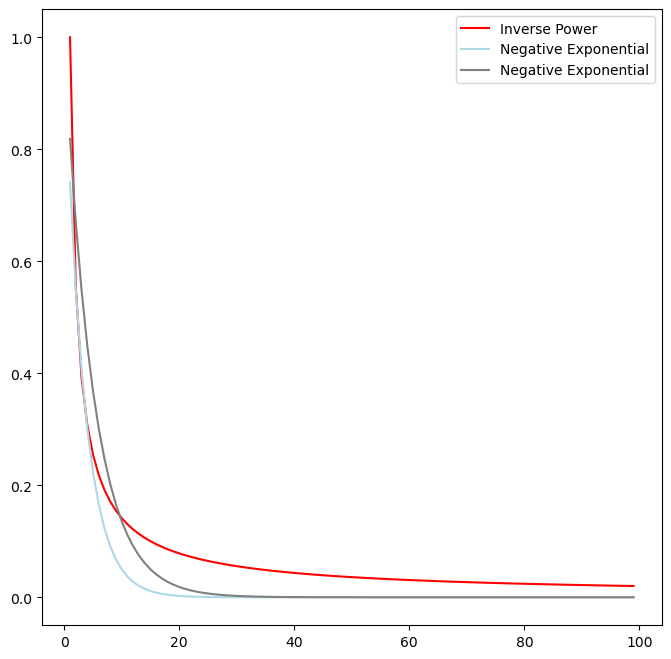

In [31]:
# Now let's consider some model tweaks.
# Starting with distance decay.
# Let's graph the distance decay parameters to get a feel for how they work.
xs = np.arange(1,100,1)
# inverse 0.85 power
y_inv_power = np.power(xs,-0.85)
# negative exponential, beta = 0.3
y_neg_exp_point3 = np.exp(-0.3*xs)
# negative exponential, beta = 0.2
y_neg_exp_point1 = np.exp(-0.2*xs)

# Now a plot.
f, ax = plt.subplots(figsize=(8,8))
ax.plot(xs,y_inv_power, label = "Inverse Power", color = "red")
ax.plot(xs,y_neg_exp_point3, label = 'Negative Exponential', color = "lightblue")
ax.plot(xs,y_neg_exp_point1, label = 'Negative Exponential', color = "gray")
ax.legend();

In [32]:
beta = 0.0002

In [33]:
dist_beta = np.exp(cleaned_data2['distance']*-beta)
Dj2_gamma = cleaned_data2["jobs"]**gamma
cleaned_data2["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i3"}, inplace=True)
#and write the A_i values back into the dataframe
cleaned_data2 = cleaned_data2.merge(A_i, left_on="station_origin", right_index=True, how="left")
cleaned_data2.head()

/tmp/ipykernel_21204/3518431497.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["Ai1"].agg(np.sum))


station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

    log_jobs  O_i    D_j        coef   alpha_i  prodsimest2  prodModelEst_exp  \
0  11.271491  599  78549  Abbey Road -2.920952         78.0              78.0   
1   6.093570  599    442  Abbey Road -2.920952          1.0               1.0   
2   6.501290  599    665  Abbey Road -2.920952          4.0               4.0   
3  10.981438  599  58772  Abbey Road -2.920952        100.0             100.0   
4   9.644004  599  15428  Abbey Road -2.920952         56.0              56.0   

   ScenarioA          Ai1      A_i2  prodsimest3      A_i3  
0    78549.0   984.578968  0.000097         84.0  0.000107  
1      442.0    18.202100  0.000097          2.0  0.000107  
2      665.0    63.891209  0.000097          4.0  0.000107  
3    29386.0  1453.897377  0.000097         63.0  0.000107  
4    15428.0   937.022978  0.000097         60.0  0.000107

In [34]:
cleaned_data2["prodsimest4"] = cleaned_data2["A_i3"]*cleaned_data2["O_i"]*Dj2_gamma*dist_beta
#round
cleaned_data2["prodsimest4"] = round(cleaned_data2["prodsimest4"])

flow_marix4 = cleaned_data2.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flow_marix4

/tmp/ipykernel_21204/3893216574.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix4 = cleaned_data2.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/3893216574.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix4 = cleaned_data2.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/3893216574.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used d

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN     10.0   
Aldgate                     NaN            NaN         1.0      NaN   
Aldgate East                NaN            NaN         1.0     47.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         1.0     38.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     17.0   
Woolwich Arsenal           34.0            NaN         NaN      NaN   
All                       446.0          361.0      2320.0   8381.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                    9.0         NaN      18.0       0.0      NaN   
Aldgate                      43.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     52.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                17.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN        35.0       NaN       NaN      NaN   
All                        9404.0       584.0     686.0     267.0    202.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town             12.0      3.0          0.0      1.0          41.0   
Aldgate                29.0      3.0          0.0      1.0          24.0   
Aldgate East           30.0      3.0          0.0      1.0          26.0   
...                     ...      ...          ...      ...           ...   
Woodford               26.0      3.0          NaN      2.0          22.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          32.0     44.0          NaN      2.0          40.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  9641.0   2009.0        543.0    672.0       15935.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               63.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      1.0   
Acton Town              4.0               73.0      11.0      1.0   
Aldgate                 4.0              243.0      44.0      4.0   
Aldgate East            4.0              254.0      46.0      5.0   
...                     ...                ...       ...      ...   
Woodford                3.0              211.0      39.0     33.0   
Woodgrange Park         NaN                NaN       NaN    257.0   
Woodside Park           3.0              107.0      28.0      1.0   
Woolwich Arsenal        NaN              727.0       NaN      NaN   
All                  2993.0            67557.0   11137.0   5507.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

In [35]:
beta = 0.0004

In [36]:
dist_beta = np.exp(cleaned_data2['distance']*-beta)
#calcualte the first stage of the Ai values
cleaned_data2["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i4"}, inplace=True)
#and write the A_i values back into the dataframe
cleaned_data2 = cleaned_data2.merge(A_i, left_on="station_origin", right_index=True, how="left")
cleaned_data2.head()

/tmp/ipykernel_21204/549701770.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["Ai1"].agg(np.sum))


station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

    log_jobs  O_i    D_j        coef   alpha_i  prodsimest2  prodModelEst_exp  \
0  11.271491  599  78549  Abbey Road -2.920952         78.0              78.0   
1   6.093570  599    442  Abbey Road -2.920952          1.0               1.0   
2   6.501290  599    665  Abbey Road -2.920952          4.0               4.0   
3  10.981438  599  58772  Abbey Road -2.920952        100.0             100.0   
4   9.644004  599  15428  Abbey Road -2.920952         56.0              56.0   

   ScenarioA         Ai1      A_i2  prodsimest3      A_i3  prodsimest4  \
0    78549.0  193.622248  0.000097         84.0  0.000107         63.0   
1      442.0    3.318499  0.000097          2.0  0.000107          1.0   
2      665.0   30.026850  0.000097          4.0  0.000107          4.0   
3    29386.0  525.683979  0.000097         63.0  0.000107         93.0   
4    15428.0  599.996110  0.000097         60.0  0.000107         60.0   

       A_i4  
0  0.000191  
1  0.000191  
2  0.000191  
3  0.000191  
4  0.000191

In [37]:
cleaned_data2["prodsimest5"] = cleaned_data2["A_i4"]*cleaned_data2["O_i"]*Dj2_gamma*dist_beta
#round
cleaned_data2["prodsimest5"] = round(cleaned_data2["prodsimest5"])

flow_marix5 = cleaned_data2.pivot_table(values ="prodsimest5", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flow_marix5

/tmp/ipykernel_21204/2191708206.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix5 = cleaned_data2.pivot_table(values ="prodsimest5", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/2191708206.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix5 = cleaned_data2.pivot_table(values ="prodsimest5", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/2191708206.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used d

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      1.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         0.0     72.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         0.0     13.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         0.0      5.0   
Woolwich Arsenal           29.0            NaN         NaN      NaN   
All                       811.0          494.0      3635.0   6934.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                    1.0         NaN      30.0       0.0      NaN   
Aldgate                      65.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                     24.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                 5.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN        25.0       NaN       NaN      NaN   
All                        7996.0       735.0    1008.0     362.0    412.0   

station_destination   Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                             
Abbey Road              NaN      NaN          NaN      NaN           NaN   
Acton Central           NaN      NaN          NaN      NaN           NaN   
Acton Town              2.0      0.0          0.0      0.0          16.0   
Aldgate                29.0      1.0          0.0      1.0          13.0   
Aldgate East           29.0      1.0          0.0      1.0          13.0   
...                     ...      ...          ...      ...           ...   
Woodford                6.0      0.0          NaN      0.0           3.0   
Woodgrange Park         NaN      NaN          NaN      NaN           NaN   
Woodside Park          17.0     85.0          NaN      1.0          16.0   
Woolwich Arsenal        NaN      NaN          NaN      NaN           NaN   
All                  7691.0   1909.0       1553.0    798.0       13642.0   

station_destination  Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                      
Abbey Road              NaN               22.0       NaN      NaN   
Acton Central           NaN                NaN       NaN      0.0   
Acton Town              0.0               15.0       2.0      0.0   
Aldgate                 1.0              370.0      61.0      1.0   
Aldgate East            1.0              377.0      63.0      1.0   
...                     ...                ...       ...      ...   
Woodford                0.0               70.0      12.0     11.0   
Woodgrange Park         NaN                NaN       NaN    344.0   
Woodside Park           0.0               33.0      12.0      0.0   
Woolwich Arsenal        NaN              218.0       NaN      NaN   
All                  5221.0            58438.0    9385.0   6532.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

In [38]:
beta = 0.2

In [39]:
dist_beta = np.exp(cleaned_data2['distance']*-beta)
#calcualte the first stage of the Ai values
cleaned_data2["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i5"}, inplace=True)
#and write the A_i values back into the dataframe
cleaned_data2 = cleaned_data2.merge(A_i, left_on="station_origin", right_index=True, how="left")
cleaned_data2.head()

/tmp/ipykernel_21204/2477752653.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  A_i = pd.DataFrame(cleaned_data2.groupby(["station_origin"])["Ai1"].agg(np.sum))


station_origin station_destination  flows  population   jobs     distance  \
0     Abbey Road   Bank and Monument      0         599  78549  8131.525097   
1     Abbey Road             Beckton      1         599    442  8510.121774   
2     Abbey Road           Blackwall      3         599    665  3775.448872   
3     Abbey Road        Canary Wharf      1         599  58772  5086.514220   
4     Abbey Road        Canning Town     37         599  15428  2228.923167   

    log_jobs  O_i    D_j        coef   alpha_i  prodsimest2  prodModelEst_exp  \
0  11.271491  599  78549  Abbey Road -2.920952         78.0              78.0   
1   6.093570  599    442  Abbey Road -2.920952          1.0               1.0   
2   6.501290  599    665  Abbey Road -2.920952          4.0               4.0   
3  10.981438  599  58772  Abbey Road -2.920952        100.0             100.0   
4   9.644004  599  15428  Abbey Road -2.920952         56.0              56.0   

   ScenarioA            Ai1      A_i2  prodsimest3      A_i3  prodsimest4  \
0    78549.0   0.000000e+00  0.000097         84.0  0.000107         63.0   
1      442.0   0.000000e+00  0.000097          2.0  0.000107          1.0   
2      665.0   0.000000e+00  0.000097          4.0  0.000107          4.0   
3    29386.0   0.000000e+00  0.000097         63.0  0.000107         93.0   
4    15428.0  3.660544e-191  0.000097         60.0  0.000107         60.0   

       A_i4  prodsimest5          A_i5  
0  0.000191         22.0  3.490825e+43  
1  0.000191          0.0  3.490825e+43  
2  0.000191          3.0  3.490825e+43  
3  0.000191         60.0  3.490825e+43  
4  0.000191         69.0  3.490825e+43

In [40]:
cleaned_data2["prodsimest6"] = cleaned_data2["A_i5"]*cleaned_data2["O_i"]*Dj2_gamma*dist_beta
#round
cleaned_data2["prodsimest6"] = round(cleaned_data2["prodsimest6"])

flow_marix6 = cleaned_data2.pivot_table(values ="prodsimest6", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
flow_marix6

/tmp/ipykernel_21204/3600181792.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix6 = cleaned_data2.pivot_table(values ="prodsimest6", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/3600181792.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  flow_marix6 = cleaned_data2.pivot_table(values ="prodsimest6", index="station_origin", columns = "station_destination",
/tmp/ipykernel_21204/3600181792.py:5: FutureWarning: The provided callable <function sum at 0x7fa9780ae980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used d

station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      0.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         0.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         0.0      0.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         0.0      0.0   
Woolwich Arsenal            0.0            NaN         NaN      NaN   
All                      8879.0            0.0         0.0   8501.0   

station_destination  Aldgate East  All Saints  Alperton  Amersham  Anerley  \
station_origin                                                               
Abbey Road                    NaN         NaN       NaN       NaN      NaN   
Acton Central                 NaN         NaN       NaN       NaN      NaN   
Acton Town                    0.0         NaN       0.0       0.0      NaN   
Aldgate                       0.0         NaN       NaN       0.0      NaN   
Aldgate East                  NaN         NaN       0.0       0.0      NaN   
...                           ...         ...       ...       ...      ...   
Woodford                      0.0         NaN       NaN       NaN      NaN   
Woodgrange Park               NaN         NaN       NaN       NaN      NaN   
Woodside Park                 0.0         NaN       0.0       NaN      NaN   
Woolwich Arsenal              NaN         0.0       NaN       NaN      NaN   
All                       12281.0      1468.0       1.0     940.0    677.0   

station_destination  Angel  Archway  Arnos Grove  Arsenal  Baker Street  \
station_origin                                                            
Abbey Road             NaN      NaN          NaN      NaN           NaN   
Acton Central          NaN      NaN          NaN      NaN           NaN   
Acton Town             0.0      0.0          0.0      0.0           0.0   
Aldgate                0.0      0.0          0.0      0.0           0.0   
Aldgate East           0.0      0.0          0.0      0.0           0.0   
...                    ...      ...          ...      ...           ...   
Woodford               0.0      0.0          NaN      0.0           0.0   
Woodgrange Park        NaN      NaN          NaN      NaN           NaN   
Woodside Park          0.0      0.0          NaN      0.0           0.0   
Woolwich Arsenal       NaN      NaN          NaN      NaN           NaN   
All                    0.0   4589.0       4445.0  24735.0        6496.0   

station_destination   Balham  Bank and Monument  Barbican  Barking  \
station_origin                                                       
Abbey Road               NaN                0.0       NaN      NaN   
Acton Central            NaN                NaN       NaN      0.0   
Acton Town               0.0                0.0       0.0      0.0   
Aldgate                  0.0                0.0       0.0      0.0   
Aldgate East             0.0                0.0       0.0      0.0   
...                      ...                ...       ...      ...   
Woodford                 0.0                0.0       0.0      0.0   
Woodgrange Park          NaN                NaN       NaN      0.0   
Woodside Park            0.0                0.0       0.0      0.0   
Woolwich Arsenal         NaN                0.0       NaN      NaN   
All                  13370.0              878.0    5052.0   1741.0   

station_destination  Barkingside  Barons Court  Bayswater  Beckton  \
station_origin                                                       
Abbey Road                   NaN  

## IV.3 Analysis

In [43]:
# Replace NA values in DataFrames with 0
observed_data = london_flows_pivot.fillna(0)
estimated_data = flow_marix.fillna(0)
scenario_a_data = flow_marix3.fillna(0)
scenario_b1_data = flow_marix4.fillna(0)
scenario_b2_data = flow_marix5.fillna(0)

# Convert DataFrames to numpy arrays
observed_array = np.array(observed_data)
estimated_array = np.array(estimated_data)
scenario_a_array = np.array(scenario_a_data)
scenario_b1_array = np.array(scenario_b1_data)
scenario_b2_array = np.array(scenario_b2_data)

# Scenario A: Compute the absolute differences in flow matrices
absolute_flow_change_a = np.abs(scenario_a_array - estimated_array)
total_absolute_flow_change_a = np.sum(absolute_flow_change_a)
average_absolute_flow_change_a = np.mean(absolute_flow_change_a)

print("Total absolute flow change for Scenario A: ", total_absolute_flow_change_a)
print("Average absolute flow change for Scenario A: ", average_absolute_flow_change_a)

# Scenario B1 (beta = 0.0002): Compute the absolute differences in flow matrices
absolute_flow_change_b1 = np.abs(scenario_b1_array - estimated_array)
total_absolute_flow_change_b1 = np.sum(absolute_flow_change_b1)
average_absolute_flow_change_b1 = np.mean(absolute_flow_change_b1)

print("Total absolute flow change for Scenario B1: ", total_absolute_flow_change_b1)
print("Average absolute flow change for Scenario B1: ", average_absolute_flow_change_b1)

# Scenario B2 (beta = 0.0004): Compute the absolute differences in flow matrices
absolute_flow_change_b2 = np.abs(scenario_b2_array - estimated_array)
total_absolute_flow_change_b2 = np.sum(absolute_flow_change_b2)
average_absolute_flow_change_b2 = np.mean(absolute_flow_change_b2)

print("Total absolute flow change for Scenario B2: ", total_absolute_flow_change_b2)
print("Average absolute flow change for Scenario B2: ", average_absolute_flow_change_b2)

Total absolute flow change for Scenario A:  73964.0
Average absolute flow change for Scenario A:  0.46459507163899727
Total absolute flow change for Scenario B1:  272520.0
Average absolute flow change for Scenario B1:  1.7117982927242918
Total absolute flow change for Scenario B2:  1420644.0
Average absolute flow change for Scenario B2:  8.923587163397215


In [44]:
delta_A = flow_marix3 - london_flows_pivot
delta_B1 = flow_marix4 - london_flows_pivot
delta_B2 = flow_marix5 - london_flows_pivot

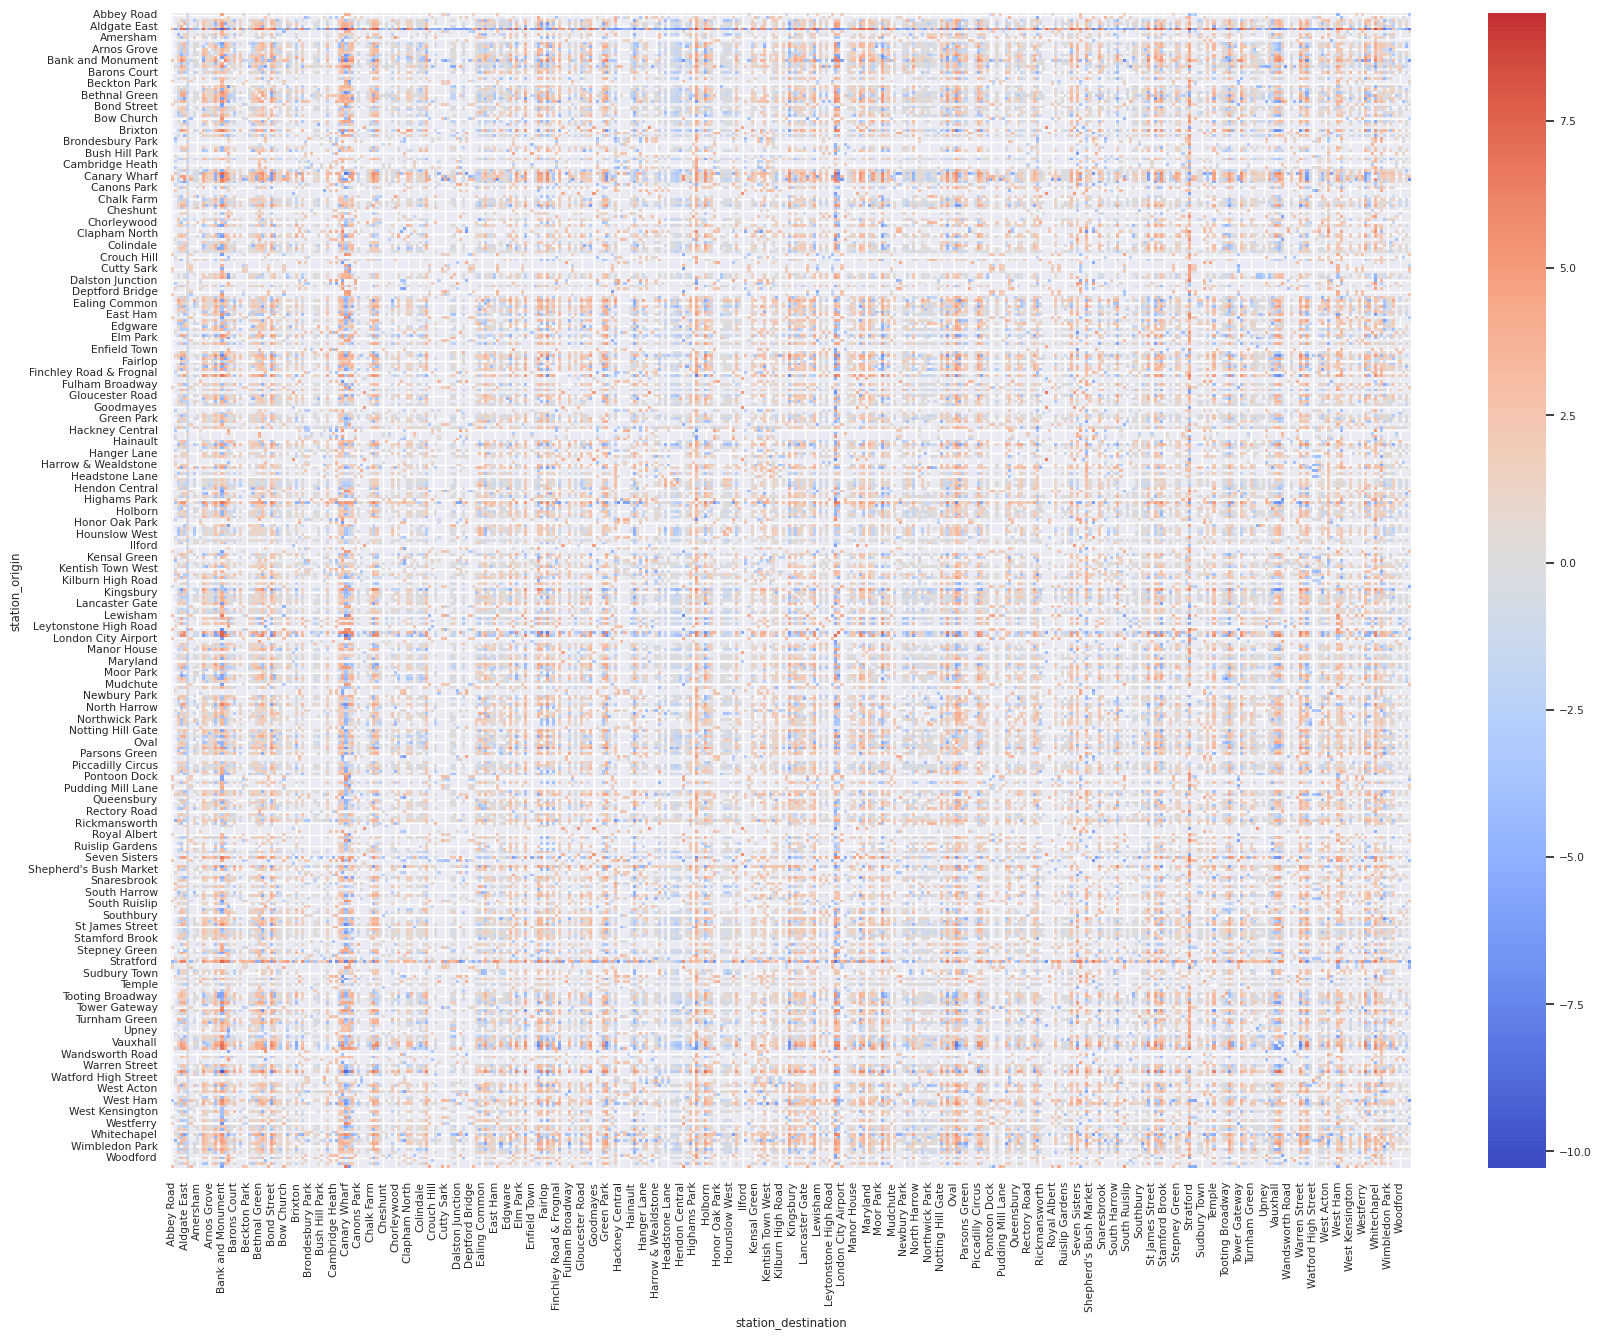

In [45]:
# Increase the size of the heatmap
plt.figure(figsize=(20, 15))

# Improve the readability of the labels
sns.set(font_scale=0.7)

# Normalize the data to focus on common changes
# Assuming 'delta_A' is a DataFrame with your change data
normalized_delta_A = np.log1p(abs(delta_A)) * np.sign(delta_A)

# Plot the heatmap with a diverging colormap and a normalization
ax = sns.heatmap(normalized_delta_A, cmap="coolwarm", center=0)

# Rotate the labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Save the heatmap to a file
output_file = 'Data/flow_change_heatmap.png'
plt.savefig(output_file)

# Show the plot
plt.show()

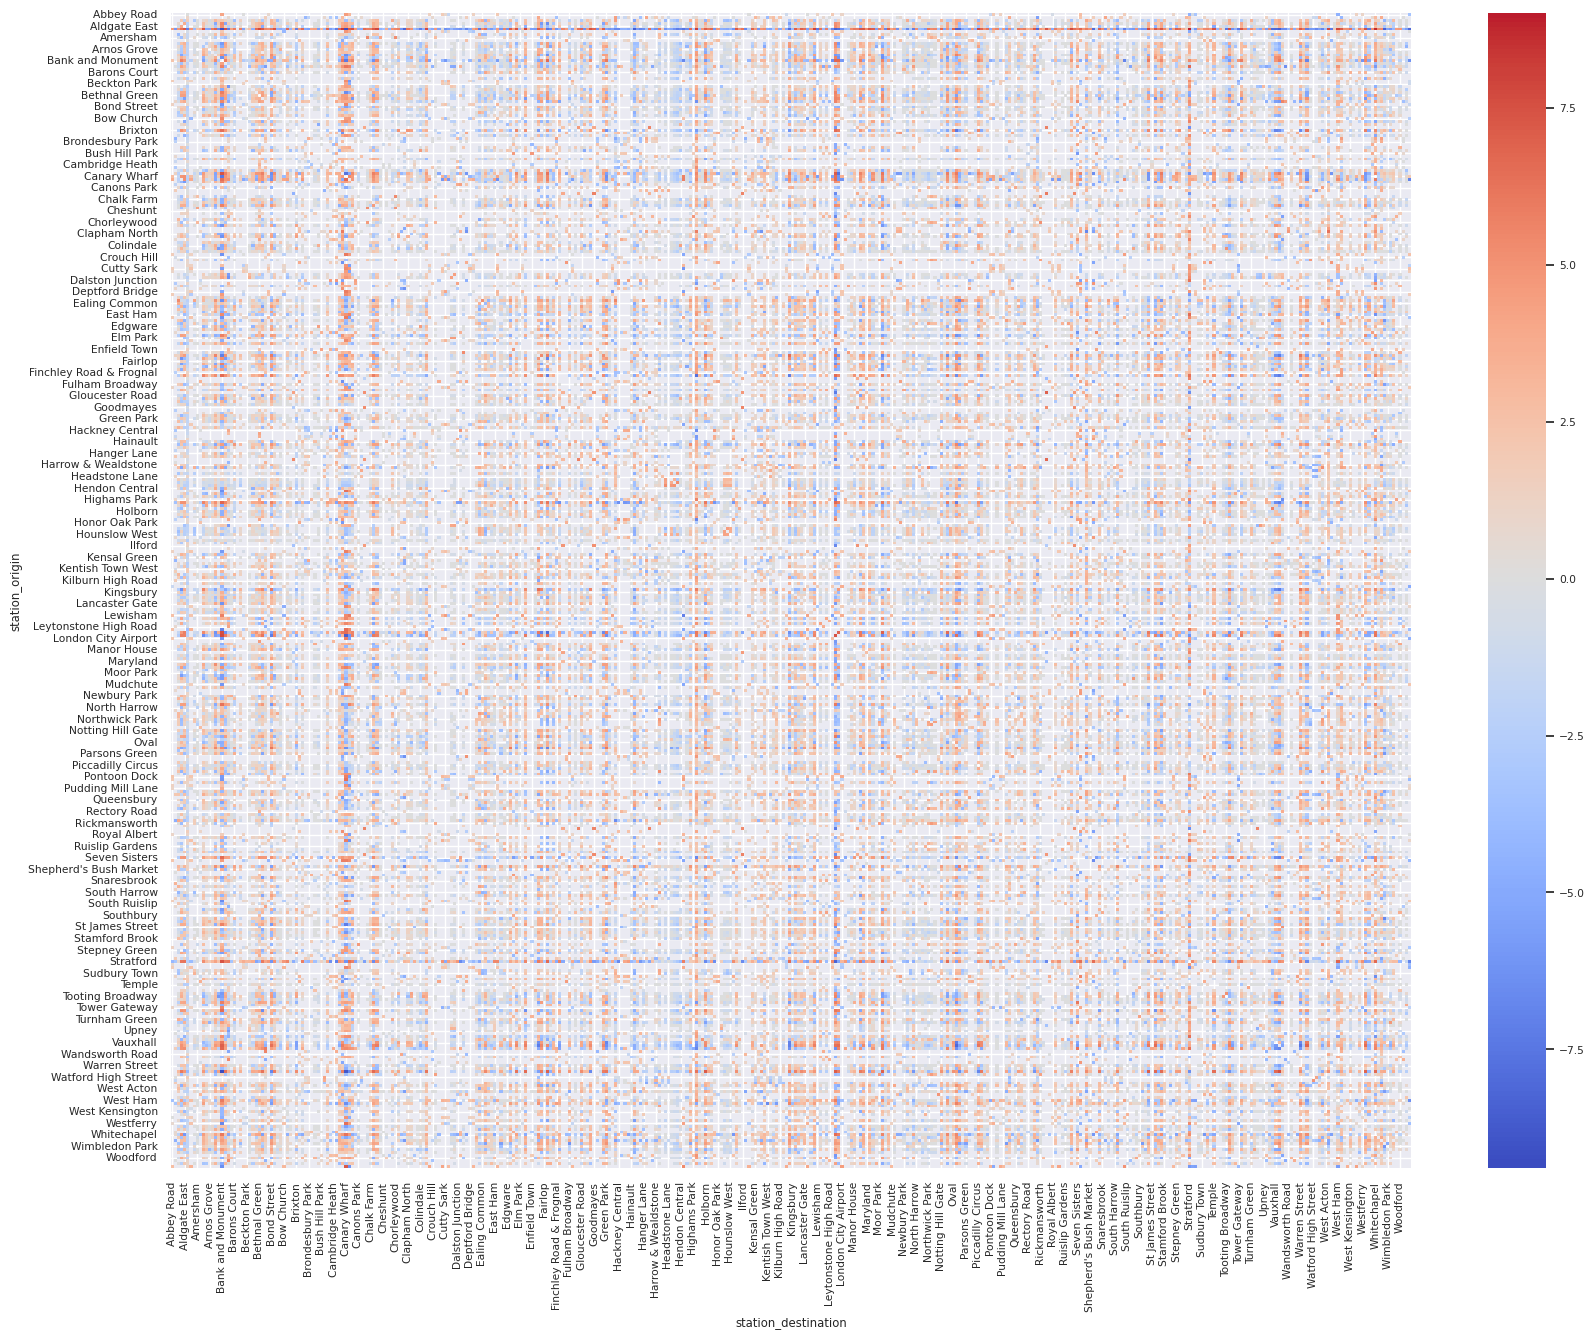

In [46]:
# Increase the size of the heatmap
plt.figure(figsize=(20, 15))

# Improve the readability of the labels
sns.set(font_scale=0.7)

# Normalize the data to focus on common changes
# Assuming 'delta_B' is a DataFrame with your change data
normalized_delta_B1 = np.log1p(abs(delta_B1)) * np.sign(delta_B1)

# Plot the heatmap with a diverging colormap and a normalization
ax = sns.heatmap(normalized_delta_B1, cmap="coolwarm", center=0)

# Rotate the labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Save the heatmap to a file
output_file = 'Data/flow_change_heatmap2.png'
plt.savefig(output_file)

# Show the plot
plt.show()

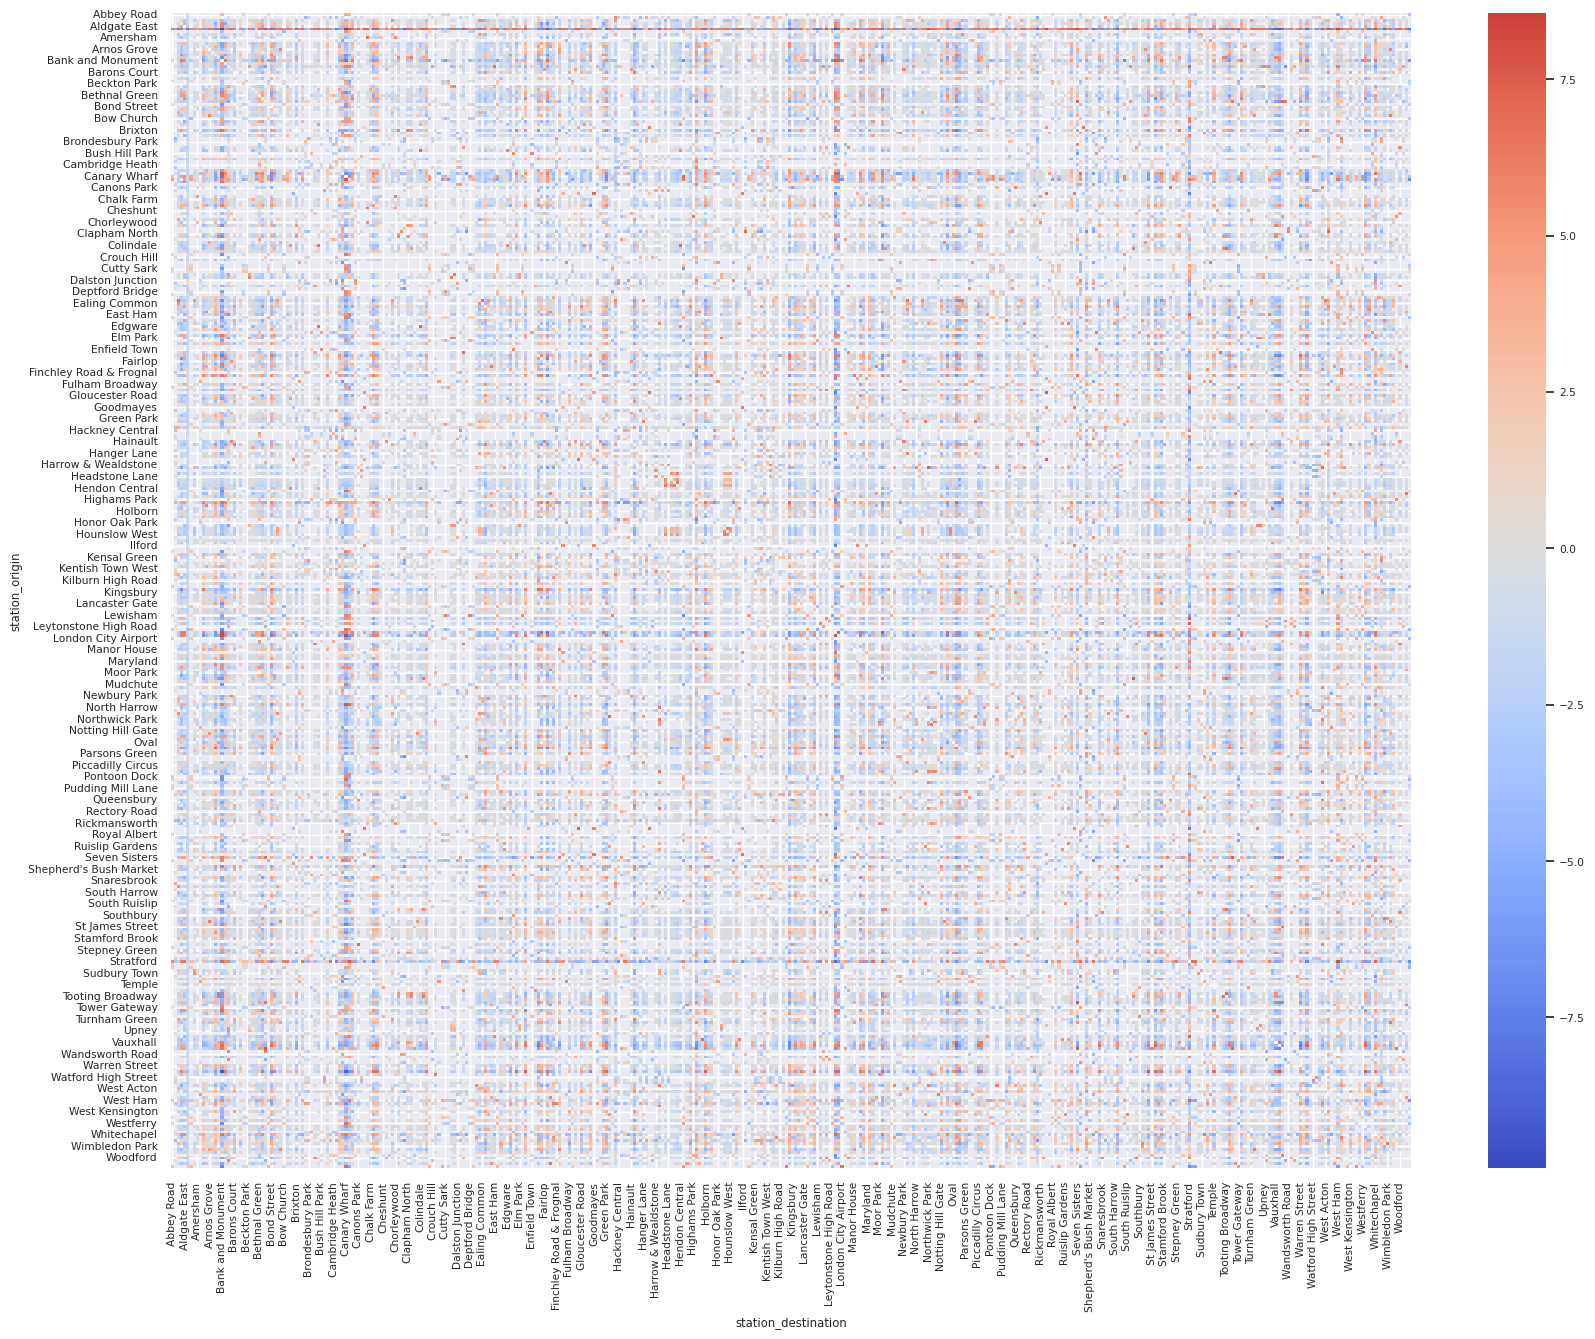

In [47]:
# Increase the size of the heatmap
plt.figure(figsize=(20, 15))

# Improve the readability of the labels
sns.set(font_scale=0.7)

# Normalize the data to focus on common changes
# Assuming 'delta_B' is a DataFrame with your change data
normalized_delta_B2 = np.log1p(abs(delta_B2)) * np.sign(delta_B2)

# Plot the heatmap with a diverging colormap and a normalization
ax = sns.heatmap(normalized_delta_B2, cmap="coolwarm", center=0)

# Rotate the labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Save the heatmap to a file
output_file = 'Data/flow_change_heatmap3.png'
plt.savefig(output_file)

# Show the plot
plt.show()